
1. (10 puntos) Un cliente lo contrata para la evaluaci ́on de c ́omo el salario del cliente afecta su propensi ́on a utilizar la tarjeta de cr ́edito del supermercado. El modelo es un modelo de clasificaci ́on que toma el valor 1 si el cliente ha usado la tarjeta en los u ́ltimos tres meses y cero si no. El analista recomienda que dada la precisi ́on y facilidad del algoritmo, un buen candidato para esto es el m ́etodo del K vecino m ́as cercado. Comente en detalle su recomendaci ́on al respecto.


Es cierto que para precisión y por facilidad de algoritmo seria recomedable usar el metodo K-vecino, lo que faltaria analizar si extamente queremos saber cual es la variable que mas afecta el uso o no uso de la tarjeta de credito,el k-vecinos, nos servira muchisimo para saber si el cliente usara su tarjeta o no, pero no tendremos la posibilidad de ver realmente cuanto es el monto que genera ese cambio. Entonces si por ejemplo a nosotros como supermercado el uso de la tarjeta de credito nos quita un 2% por comisiones, queremos saber cuales son las variables que mas afectan para que el  cliente usa la tarjeta, para asi realizar una estrategia sobre eso. Si el caso es el mencionado, se podria usar un clasificador con funcion sigmoid, nos hara una clasificación quizas no tan exacta pero tendremos la posibilidad de saber cuanto nos afecta realmente cada variable .

2. (5 puntos) El error cu ́adratico medio en problemas de clasificaci ́on no es muy preciso. Para esto, es mejor utilizar la ra ́ız de este como funci ́on de costo, ya que este permite intuitivamente entender la unidad de medida en la estimaci ́on. Comente

Para los problemas de clasificación las funciones de costo como no tienen ningun sentido, esto dado que por ejemplo si mi Y=1 , el y_pred = 0 MSE = (1 - 0 ^)^2  = 1, esto no tiene ningun sentido, es por eso que aparece un nuevo modelo de costo llamado Binary Cross Entropy, la cual castigara muchisimo al modelo en el caso que se equivoque y lo premiara mucho si acierta.

3. (5 puntos) Explique cu ́al es la ventaja que posee el support vector classifier sobre el maximal margin classifier.


El Support Vector Classifier es creado apartir de el Maximal Margin Classifier y este es mejor dado que es este es menos sencible a los datos unicos o dicho de otra manera el maximal margin classifier es mucho mas duro al tirar el vector

4. (10 puntos) En un restaurant los duen ̃os poseen el problema que algunos clientes s ́olo vienen a comer una vez y no vuelven m ́as. Plantee un modelo de clasificaci ́on donde pueda predecir si un cliente volver ́a o no al restaurant. Para esto defina el posible modelo, su variable dependiente y los posibles atributos que le permitir ́ıan llevar esto a cabo.

Para esto antes de saber que modelo realizar es saber si queremos saber cual es la variable que mas afecta a que un cliente vuelva o no vuelva, eso es lo que determinara cual modelo utilizaremos, dicho esto creo que habria uqe investigar cuales son las causas mas comunes de estos clientes que vienen a comer una vez al resutaurant y luego nunca mas. Las viariables que podria llegar a utilizar para hacer una claisifcación es Tipo de comida escogida y porque usaria esta variable, seria para saber si existe alguna comida que estoy sirviendo no le gusta a mis clientes. Entonces como no me importa cual es la intuición de las variables, utilizaria un k-vecinos para solventar este problema de clasificación.



5. (10 puntos) Un an ́alista le recomienda que dada su simplicidad utilice una re- gresi ́on lineal en un problema de clasificaci ́on. Esto a su vez le permitir ́a medir los efectos de cada atributo en la clase predicha. Comente en detalle su recomendaci ́on al respecto.

El modelo de regresion no me sirve para modelos de clasificación ,porque el resultado de la regresion puede dar fuera de rango, entonces como yo en clasificación lo que realmente estoy haciendo es un modelo probabilistico, lo que necesito es usar una función en donde siempre me da valores entre 0 y 1, aun asi es cierto que en muchos modelos de clasificación como el k-vecinos se pierde el saber cuanto es el efecto marginal de cada atributo, pero hoy en dia existen modelos como la Sigmoid Function, que aun me permiten clasificar probabilisticamente y aun teniendo la intuición de efecto marginal de cada atributo.

### Ejercicio de Python.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. (2 puntos) Importe la base de datos real estate a Python. Para esto es recomen- dado utilizar el paquete Pandas.

In [126]:
real_state_db = pd.read_csv("/Users/sebastianschmidtpuga/Desktop/MachineLearnig-Alexis/Examen/real_estate.csv")
real_state_db.columns
real_state_db.dtypes

Valor (UF)         float64
Dormitorios        float64
Banos              float64
sup. construida    float64
sup. Terreno       float64
estacion metro      object
dtype: object

In [127]:
real_state_db['estacion metro'] = pd.to_numeric(real_state_db['estacion metro'],errors = 'coerce')
real_state_db.dtypes


Valor (UF)         float64
Dormitorios        float64
Banos              float64
sup. construida    float64
sup. Terreno       float64
estacion metro     float64
dtype: object

### 2. (3 puntos) Elimine las observaciones que no poseen datos completos para cada observaci ́on.


In [128]:
real_state_db = real_state_db.dropna()
real_state_db.isna().any() 
real_state_db.dtypes


Valor (UF)         float64
Dormitorios        float64
Banos              float64
sup. construida    float64
sup. Terreno       float64
estacion metro     float64
dtype: object


### 3. (5 puntos) Realice un trabajo de visualizaci ́on de cada variable explicativa en su relaci ́on con la variable dependiente. Para esto, realice un scatter plot de cada atributo vs el precio de arriendo. Explique en cada caso que relación pareciera existir entre las dos variables.

Existe una tendencia hacia un aumento de precio mientras mas dormitorios existan


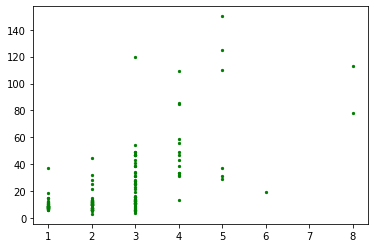

In [238]:
plt.scatter(real_state_db.Dormitorios,real_state_db["Valor (UF)"],s=5,color='green')
print("Existe una tendencia de un aumento de precio mientras mas dormitorios existan")

Existe una tendencia de un aumento de precio mientras mas Baños existan


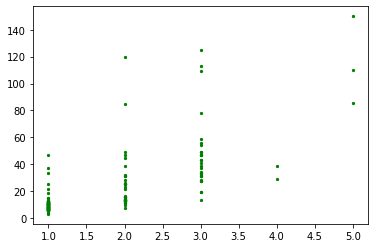

In [248]:
plt.scatter(real_state_db.Banos,real_state_db["Valor (UF)"],s=5,color='green')
print("Existe una tendencia de un aumento de precio mientras mas Baños existan")

Existe una tendencia de un aumento de precio mientras mas metros contruidos existan existan


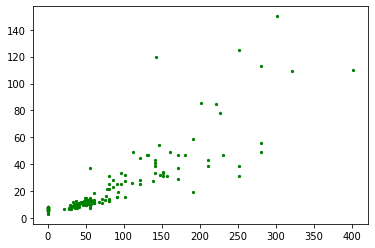

In [244]:
plt.scatter(real_state_db["sup. construida"],real_state_db["Valor (UF)"],s=5,color='green')
print("Existe una tendencia de un aumento de precio mientras mas metros contruidos existan existan")

Existe una tendencia de un aumento de precio mientras mas terreno existan


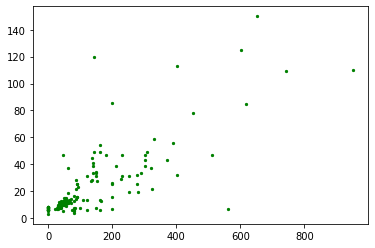

In [242]:
plt.scatter(real_state_db["sup. Terreno"],real_state_db["Valor (UF)"],s=5,color='green')
print("Existe una tendencia de un aumento de precio mientras mas terreno existan")

No se logra apreciar una tendencia muy clara, pero creo que existe una tendencia de precios mas altos de hogares a una distancia media del metro, no tan lejos y tampoco tan cerca


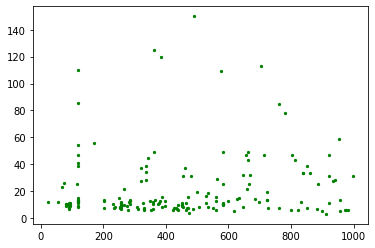

In [240]:
plt.scatter(real_state_db["estacion metro"],real_state_db["Valor (UF)"],s=5,color='green')
print("No se logra apreciar una tendencia muy clara, pero creo que existe una tendencia de precios mas altos de hogares a una distancia media del metro, no tan lejos y tampoco tan cerca")


### 4. (10 puntos) Estime una regresi ́on lineal donde la variable dependiente es el loga- ritmo natural del precio de arriendo y las variables explicativas son el nu ́mero de dormitorios, nu ́mero de ban ̃os, el logaritmo natural de la superficie construida, el logaritmo natural de la superficie de terreno y el logaritmo natural de la distancia a la estaci ́on de metro m ́as cercana.

Al correr numeros 0 en el logaritmo natural este lo que genera es que el valor sea -infinito, lo que hace imposible correr la base, lo que hare sera aumentar en 1 todos los valores negativos de superficie contruida y superficie 

In [134]:

real_state_db["sup. Terreno"] += 1
real_state_db["sup. construida"] += 1
real_state_db.describe()

,Valor (UF),Dormitorios,Banos,sup. construida,sup. Terreno,estacion metro
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,21.420569,2.435028,1.638418,74.584746,117.559322,448.299435
std,24.300368,1.228226,0.913469,74.967934,148.735955,263.719905
min,3.100800,1.000000,1.000000,1.000000,1.000000,25.000000
25%,8.200000,2.000000,1.000000,31.000000,36.000000,257.000000
50%,11.510000,2.000000,1.000000,51.000000,56.000000,425.000000
75%,26.300000,3.000000,2.000000,96.000000,149.000000,647.000000
max,150.000000,8.000000,5.000000,401.000000,951.000000,997.000000


In [135]:

X = np.column_stack([np.ones_like(real_state_db.Dormitorios), real_state_db.Dormitorios , real_state_db.Banos , np.log(real_state_db["sup. construida"]), np.log(real_state_db["sup. Terreno"]),  np.log(real_state_db["estacion metro"])])


In [136]:
β = np.linalg.lstsq(X,np.log(real_state_db["Valor (UF)"]),rcond=None)[0]
print(β)


[1.02215795 0.10904785 0.36509392 0.17283998 0.02038824 0.02272078]


In [137]:
y_hat = X@β


In [138]:
import statsmodels.api as sm

model_a = sm.OLS(np.log(real_state_db["Valor (UF)"]),X)
model_a = model_a.fit()
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Valor (UF)   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     123.8
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           6.39e-55
Time:                        09:38:59   Log-Likelihood:                -72.953
No. Observations:                 177   AIC:                             157.9
Df Residuals:                     171   BIC:                             177.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0222      0.243      4.199      0.000       0.542       1.503
x1             0.1090      0.033      3.268      0.001       0.043       0.175
x2             0.3651      0.046      7.924      0.000       0.274       0.456
x3             0.1728      0.026      6.615      0.000       0.121       0.224
x4             0.0204      0.026      0.771      0.442      -0.032       0.073
x5             0.0227      0.041      0.548      0.584      -0.059       0.105
==============================================================================
Omnibus:                       35.003   Durbin-Watson:                   1.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.704
Skew:                           0.917   Prob(JB):                     4.43e-16
Kurtosis:                       5.495   Cond. No.                         76.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5 puntos) Calcule el ECM de la estimaci ́on previa. ¿Qu ́e problema podr ́ıa tener el calcular este estad ́ıstico con toda la muestra?

In [140]:
ECM_1 = np.mean((np.log(real_state_db["Valor (UF)"])-y_hat)**2)
ECM_1

0.13351362868867714

El problema mas grande de esta estimación es que como se esta haciendo con toda la muestra no se esta haciendo crossvalidation, osea no logro saber si estoy sobreestimando el modelo o no, dado que estoy testiando y entrenando con toda la muestra

6. (10 puntos) Realice una estimaci ́on de la variable dependiente en logaritmo natural y cada una de las variables independientes utilizadas en 4. Es decir corra una regresi ́on lineal con una constante y una sola variable independiente para cada caso. Realice un gr ́afico con scatter plot para los valores reales y una recta para el valor predicho en cada caso. Documente en qu ́e caso pareciera que existe un underfitting.

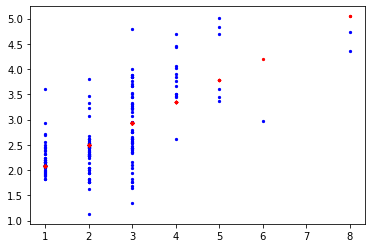

In [148]:
X_2 = np.column_stack([np.ones_like(real_state_db.Dormitorios), real_state_db.Dormitorios])
y = np.log(real_state_db["Valor (UF)"])
β_2 = np.linalg.lstsq(X_2,y,rcond=None)[0]
y_pred_2 = X_2@β_2
plt.scatter(real_state_db.Dormitorios , y,color='blue',s=5)
plt.scatter(real_state_db.Dormitorios , y_pred_2,color='red',s=5)
 


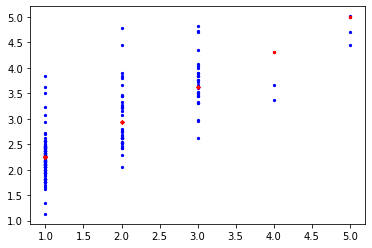

In [149]:
X_3 = np.column_stack([np.ones_like(real_state_db.Banos), real_state_db.Banos])
β_3 = np.linalg.lstsq(X_3,y,rcond=None)[0]
y_pred_3 = X_3@β_3
plt.scatter(real_state_db.Banos , y,color='blue',s=5)
plt.scatter(real_state_db.Banos , y_pred_3,color='red',s=5)

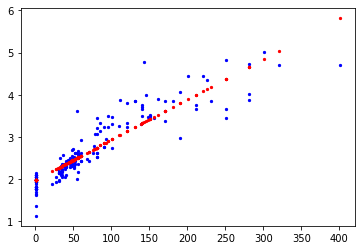

In [150]:
X_4 = np.column_stack([np.ones_like(real_state_db["sup. construida"]), real_state_db["sup. construida"]])
β_4 = np.linalg.lstsq(X_4,y,rcond=None)[0]
y_pred_4 = X_4@β_4
plt.scatter(real_state_db["sup. construida"] , y,color='blue',s=5)
plt.scatter(real_state_db["sup. construida"], y_pred_4,color='red',s=5)


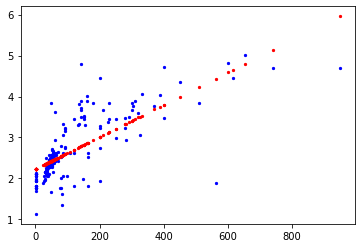

In [151]:
X_5 = np.column_stack([np.ones_like(real_state_db["sup. Terreno"]), real_state_db["sup. Terreno"]])
β_5 = np.linalg.lstsq(X_5,y,rcond=None)[0]
y_pred_5 = X_5@β_5
plt.scatter(real_state_db["sup. Terreno"] , y,color='blue',s=5)
plt.scatter(real_state_db["sup. Terreno"], y_pred_5,color='red',s=5)


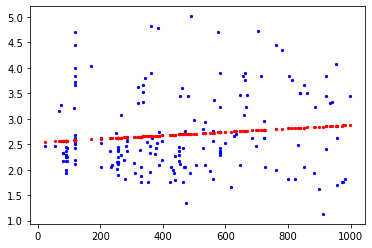

In [152]:
X_6 = np.column_stack([np.ones_like(real_state_db["estacion metro"]), real_state_db["estacion metro"]])
β_6 = np.linalg.lstsq(X_6,y,rcond=None)[0]
y_pred_6 = X_6@β_6
plt.scatter(real_state_db["estacion metro"] , y,color='blue',s=5)
plt.scatter(real_state_db["estacion metro"], y_pred_6,color='red',s=5)

Por lo que se puede ver en los graficos, se podria decir que el ultimo modelo, entre distancia al metro y precio de la vivienda, esta underfitted, dado que no logra de buena manera encontrar la verdadera pendiente de la recta.

### 7. (10 puntos) Estime un modelo donde incorpore una constante y la superficie con- struida como polinomio desde el grado 2 hasta el grado 10 (utilice el precio como variable dependiente). Reporte el ECM para este modelo. Para realizar esto, utilice una muestra de entrenamiento y testeo.

In [175]:
from sklearn.model_selection import train_test_split
X = real_state_db["sup. construida"] 
y = real_state_db["Valor (UF)"]

K = 10
X_10 = np.column_stack([X**k for k in range(K+1)])
X_train, X_test, y_train, y_test = train_test_split(X_10, y, test_size = 0.3, random_state = 0)
β_10= np.linalg.lstsq(X_train,y_train,rcond=None)[0]
y_pred_10 = X_test@β_10
ECM = np.mean((y_pred_10 - y_test)**2)
ECM

337.0816719500022

### 8. (15 puntos) Utilizando la estimaci ́on encontrada en el punto anterior, regularice utilizando el m ́etodo de Ridge Regression. Para esto, cree una grilla de 10 valores para λ entre 0 y 5 y testee con cu ́al de ellos se encuentra el menor ECM. Es decir, diga con que λ de los 10 de la grilla el modelo posee el mejor ajuste. Para realizar esto, en cada caso, utilice una muestra de entrenamiento y testeo.

In [226]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


Ridge1 = Ridge(alpha=0.01)
Ridge1.fit(X_train, y_train) 
pred_train_rr= Ridge1.predict(X_test)
print((mean_squared_error(y_test,pred_train_rr)))



134.2295333132643


/Users/sebastianschmidtpuga/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.59537e-55): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [227]:
Ridge1 = Ridge(alpha=0.1)
Ridge1.fit(X_train, y_train) 
pred_train_rr= Ridge1.predict(X_test)
print((mean_squared_error(y_test,pred_train_rr)))

134.10305740082285


/Users/sebastianschmidtpuga/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.59537e-54): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [228]:
Ridge1 = Ridge(alpha=0.25)
Ridge1.fit(X_train, y_train) 
pred_train_rr= Ridge1.predict(X_test)
print((mean_squared_error(y_test,pred_train_rr)))

133.97751326072304


/Users/sebastianschmidtpuga/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.14884e-53): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [229]:
Ridge1 = Ridge(alpha=0.5)
Ridge1.fit(X_train, y_train) 
pred_train_rr= Ridge1.predict(X_test)
print((mean_squared_error(y_test,pred_train_rr)))

133.719744884907


/Users/sebastianschmidtpuga/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.29768e-53): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [230]:
Ridge1 = Ridge(alpha=1)
Ridge1.fit(X_train, y_train) 
pred_train_rr= Ridge1.predict(X_test)
print((mean_squared_error(y_test,pred_train_rr)))

133.23481129679087


/Users/sebastianschmidtpuga/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.59537e-53): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [231]:
Ridge1 = Ridge(alpha=1.5)
Ridge1.fit(X_train, y_train) 
pred_train_rr= Ridge1.predict(X_test)
print((mean_squared_error(y_test,pred_train_rr)))

132.92837082425675


/Users/sebastianschmidtpuga/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.2893e-52): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [232]:
Ridge1 = Ridge(alpha=2)
Ridge1.fit(X_train, y_train) 
pred_train_rr= Ridge1.predict(X_test)
print((mean_squared_error(y_test,pred_train_rr)))

132.62838919025484


/Users/sebastianschmidtpuga/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.71907e-52): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [233]:
Ridge1 = Ridge(alpha=2.51)
Ridge1.fit(X_train, y_train) 
pred_train_rr= Ridge1.predict(X_test)
print((mean_squared_error(y_test,pred_train_rr)))

132.32623785107455


/Users/sebastianschmidtpuga/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.15744e-52): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [234]:
Ridge1 = Ridge(alpha=3)
Ridge1.fit(X_train, y_train) 
pred_train_rr= Ridge1.predict(X_test)
print((mean_squared_error(y_test,pred_train_rr)))

132.10154634393973


/Users/sebastianschmidtpuga/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.57861e-52): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [235]:
Ridge1 = Ridge(alpha=4)
Ridge1.fit(X_train, y_train) 
pred_train_rr= Ridge1.predict(X_test)
print((mean_squared_error(y_test,pred_train_rr)))


131.73472024871705


/Users/sebastianschmidtpuga/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.43815e-52): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [237]:
Ridge1 = Ridge(alpha=4.99)
Ridge1.fit(X_train, y_train) 
pred_train_rr= Ridge1.predict(X_test)
print((mean_squared_error(y_test,pred_train_rr)))


131.45216342559095


/Users/sebastianschmidtpuga/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.28909e-52): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


El ECM mas chico es el mas cercano a alpha 5